# EXPÉRIENCE AVEC LES BTS2 SN



## OBJECTIF :
##### Le but de cette expérience est de savoir si le piano de ma fille est bien accordée. Pour cela, le 3ème LA a été joué et enregistré à une fréquence d'échantillonage de 44 kz sur 16 bits grâce au logiciel libre Audacity.
##### Rappelons que cette note correspond à une fréquence de 440 hz.


## Mise en place :
Pour parvenir à nos fins, le fichier piano.wav se trouve à la racine et nous utiliserons un environnement Python 3.6.


## ÉTAPE 1

Nous allons importer les modules et bibliothèques nécessaires au traitement du son, au calcul (TFD) et au tracé de graphique.

- *scipy* pour tout ce qui tourne autour des maths, de l'ingénierie, des sciences en général. Ici, c'est la bibliothèque de traitement de fichiers son qui nous intéresse.
- *numpy* pour le calcul mathématiques (*Fast Fourier Transform*, ici).
- *matplotlib* pour le tracé de graphiques : pour l'usage en ligne avec les notebooks il faut le spécifier avec la première ligne.

In [1]:
%matplotlib inline
from scipy.io.wavfile import read
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft

## ÉTAPE 2

L'étape suivante consiste en premier lieu à ouvrir notre fichier sonore 'piano.wav' avec la fonction 'read()'.
Attention, cette fonction retourne pour un fichier sonore deux valeurs : le taux d'échantillonnage **et** les données.

Compléter le code en remplaçant les *???* et tenant compte des points suivants :

1. Il faut penser à affecter le retour de la fonction 'read()' à deux variables simultanément que l'on nommera 'tx_echant' et 'donnees'.
2. On récupère la taille du fichier sonore avec la méthode '.size' que l'on affecte à une variable.
3. La durée du morceau est égale au quotient de la taille par le taux d'échantillonnage.
4. On affiche cette durée.

In [2]:
tx_echant, donnees = read('piano.wav')
taille = donnees.size
duree = taille / tx_echant
print(duree, "secondes")


2.0085260770975055 secondes


## ÉTAPE 3

On souhaite maintenant tracer la représentation temporelle du signal audio.
Vous allez recopier les instructions qui vous seront données en capture d'écran et nous allons les commenter :

- il nous faut une fenêtre temporelle d'étude du signal (axe des abscisses) : on échantillonne notre signal ! Pour cela on prend la taille de notre signal et on la divise par la fréquence du signal ;
- la fonction arange() va prendre des valeurs de façon régulière entre 0 et le nombre maximum de données avec un incrément de 1.

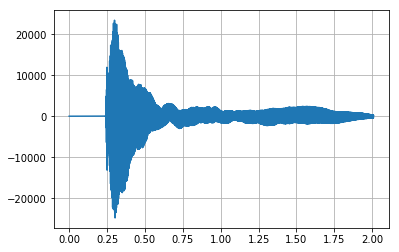

In [3]:
te = np.arange(taille)/tx_echant
plt.figure(1)
plt.plot(te,donnees)
plt.grid(True)
plt.show(1)

## ÉTAPE 4

On souhaite maintenant obtenir la représentation **spectrale** de notre signal qui nous donnera la *fondamentale* de notre note et ses *harmoniques*...

Pour cela il faut calculer la TFD du signal : on se tourne vers l'algorithme **FFT** (*Fast Fourier Transform*) du module *Numpy*.
Il nous faut :
- un début et une fin ;
- la fréquence d'échantillonnage du signal ;
- les données du signal.

Nous allons définir une fonction *tracerSpectre()* que nous pourrons appeler quand nous le souhaitons avec les paramètres cités au-dessus.

In [22]:
def tracerSpectre(donnees,tx_echant,debut,duree):
    start = int(debut*tx_echant)
    stop = int((debut+duree)*tx_echant)
    spectre = np.absolute(fft(donnees[start:stop]))
    spectre = spectre/spectre.max()
    n = spectre.size
    freq = np.arange(n)*1.0/n*tx_echant
    plt.figure(2)
    plt.vlines(freq,[0],spectre,'r')
    plt.xlabel('f (Hz)')
    plt.ylabel('A')
    plt.axis([430,0.01*tx_echant,0,1])
    plt.grid()
    plt.show(2)

Ensuite, il ne reste plus qu'à appeler notre fonction avec les arguments :
- donnees (en mémoire)
- tx_echant (en mémoire)
- debut : à choisir (en secondes)
- duree : à choisir (en secondes)

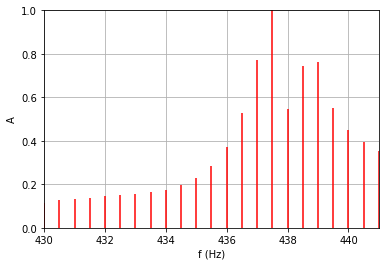

In [25]:
tracerSpectre(donnees,tx_echant,0,2)
